In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score 
from sklearn.metrics import root_mean_squared_error

In [2]:
df=pd.read_csv('../data/processed/clean_data.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122,37,41,880,129,322,126,8,452600,0,0,0,1,0
1,-122,37,21,7099,1106,2401,1138,8,358500,0,0,0,1,0
2,-122,37,52,1467,190,496,177,7,352100,0,0,0,1,0
3,-122,37,52,1274,235,558,219,5,341300,0,0,0,1,0
4,-122,37,52,1627,280,565,259,3,342200,0,0,0,1,0


In [3]:
X, y= df.drop("median_house_value", axis=1), df["median_house_value"]
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122,37,41,880,129,322,126,8,0,0,0,1,0
1,-122,37,21,7099,1106,2401,1138,8,0,0,0,1,0
2,-122,37,52,1467,190,496,177,7,0,0,0,1,0
3,-122,37,52,1274,235,558,219,5,0,0,0,1,0
4,-122,37,52,1627,280,565,259,3,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121,39,25,1665,374,845,330,1,0,1,0,0,0
20636,-121,39,18,697,150,356,114,2,0,1,0,0,0
20637,-121,39,17,2254,485,1007,433,1,0,1,0,0,0
20638,-121,39,18,1860,409,741,349,1,0,1,0,0,0


In [4]:
y

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20640, dtype: int64

In [5]:
scale=StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train_S=scale.fit_transform(X_train)
X_test_S=scale.fit_transform(X_test)

In [6]:
X_train_S.shape

(15480, 13)

In [7]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train_S, y_train )

RandomForestRegressor()

In [8]:
y_train_predict_s=forest.predict(X_train_S)
y_test_prediction_s=forest.predict(X_test_S)

In [9]:
train_r2_score=r2_score(y_train_predict_s,y_train)
test_r2_score=r2_score(y_test_prediction_s,y_test)
print(f"train_r2_score:{train_r2_score},  test_r2_score: {test_r2_score}")

train_r2_score:0.9564338809217013,  test_r2_score: 0.6541538588072878


### Training set plot


In [35]:
import os
folder = 'results/figures'

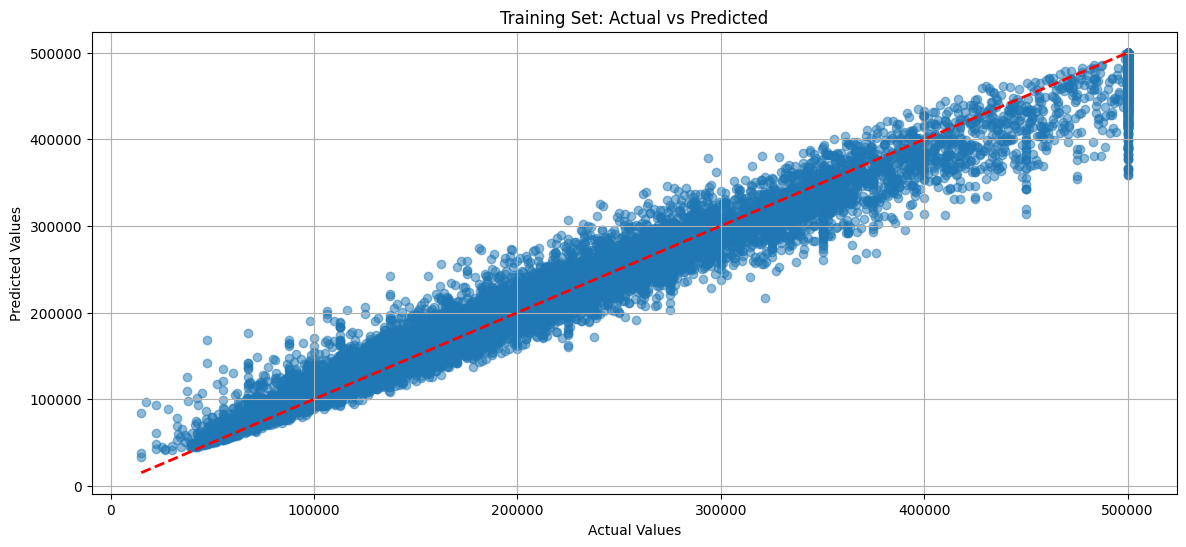

In [38]:
filename = 'Train_data.png'
os.makedirs(folder, exist_ok=True)
file_path = os.path.join(folder, filename)
plt.figure(figsize=(14,6))
plt.scatter(y_train, y_train_predict_s, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],'r--', linewidth=2)
plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig(fname=file_path, dpi=300, bbox_inches='tight')

plt.grid(True)
 

### Test set plot

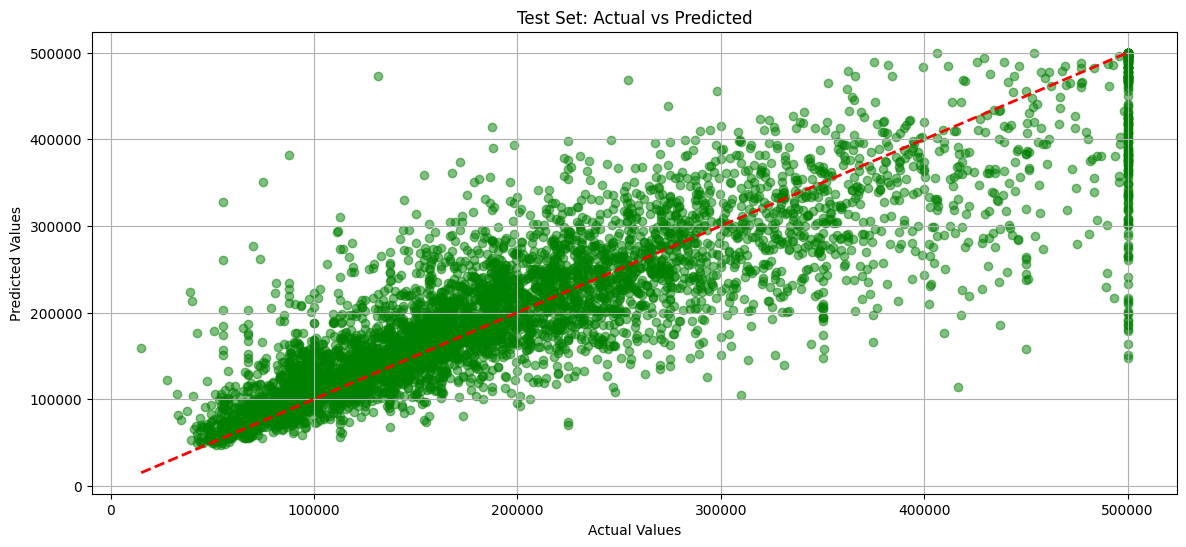

In [36]:
filename = 'Test_data.png'
os.makedirs(folder, exist_ok=True)
file_path = os.path.join(folder, filename)
plt.figure(figsize=(14,6))
plt.scatter(y_test, y_test_prediction_s, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Test Set: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.savefig(fname=file_path, dpi=300, bbox_inches='tight')
plt.grid(True)

### R-squared Scores for Train and Test Data

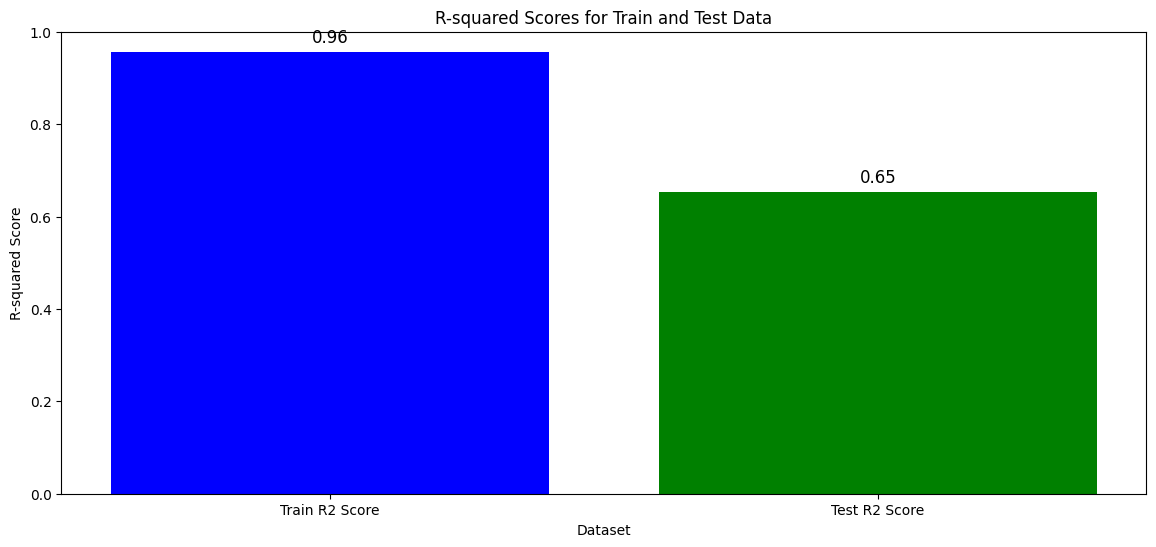

In [39]:
filename = 'R_squard_scores.png'
os.makedirs(folder, exist_ok=True)
file_path = os.path.join(folder, filename)
plt.figure(figsize=(14, 6))
scores = [train_r2_score, test_r2_score]
labels = ['Train R2 Score', 'Test R2 Score']
colors = ['blue', 'green']

plt.bar(labels, scores, color=colors)
plt.ylim(0, 1)

plt.title('R-squared Scores for Train and Test Data')
plt.ylabel('R-squared Score')
plt.xlabel('Dataset')

for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f"{score:.2f}", ha='center', fontsize=12)
plt.savefig(fname=file_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()